In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
total_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print("test data : ", len(test_data.index))
print("total data : ", len(total_data.index))

test data :  1459
total data :  1460


In [4]:
def preprocessing(df):

    conversion_dict = {'Ex': 9, 'Gd': 7,'TA': 5,'Fa': 3,'Po': 1,'NA': 0}
    df['BsmtCond_num'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0]).map(conversion_dict)
    df['HeatingQC_num'] = df['HeatingQC'].fillna(df['HeatingQC'].mode()[0]).map(conversion_dict)
    df['KitchenQual_num'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0]).map(conversion_dict)
    df['GarageQual_num'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0]).map(conversion_dict)
    df['ExterQual_num'] = df['ExterQual'].fillna(df['ExterQual'].mode()[0]).map(conversion_dict)
    df['ExterCond_num'] = df['ExterCond'].fillna(df['ExterCond'].mode()[0]).map(conversion_dict)

    df['LotShape'] = df['LotShape'].replace({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})
    df['Utilities'] = df['Utilities'].replace({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1})
    df['HouseStyle'] = df['HouseStyle'].replace({'1Story': '1Story', '1.5Fin': '1Story', '1.5Unf': '1Story',
                                                                 '2Story': '2Story', '2.5Fin': '2Story', '2.5Unf': '2Story',
                                                                 'SFoyer': 'Split', 'SLvl': 'Split'})

    one_hot_encoding = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle')

    df = pd.concat([df, one_hot_encoding],axis=1)

    columns_to_drop = ['Id','MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
                       'Alley', 'LandContour', 'LotConfig', 'LandSlope',
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                       'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtQual',
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
                       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'CentralAir',
                       'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath',
                       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
                       'GarageFinish', 'GarageCars', 'GarageCond', 'PavedDrive',
                       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
                       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'HouseStyle',
                       'ExterQual', 'ExterCond', 'BsmtCond', 'HeatingQC',
                       'KitchenQual', 'GarageQual']

    # y_train = total_data.iloc[:,-1]
    df.drop(columns=columns_to_drop,axis=1,inplace=True)
    return df

In [5]:
total_data = preprocessing(total_data)
total_data

,LotArea,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SalePrice,BsmtCond_num,HeatingQC_num,KitchenQual_num,GarageQual_num,ExterQual_num,ExterCond_num,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Split
0,8450,4,4,7,5,2003,2003,856,856,854,...,208500,5,9,7,5,7,5,0,1,0
1,9600,4,4,6,8,1976,1976,1262,1262,0,...,181500,5,9,5,5,5,5,1,0,0
2,11250,3,4,7,5,2001,2002,920,920,866,...,223500,5,9,7,5,7,5,0,1,0
3,9550,3,4,7,5,1915,1970,756,961,756,...,140000,7,7,7,5,5,5,0,1,0
4,14260,3,4,8,5,2000,2000,1145,1145,1053,...,250000,5,9,7,5,7,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,4,4,6,5,1999,2000,953,953,694,...,175000,5,9,5,5,5,5,0,1,0
1456,13175,4,4,6,6,1978,1988,1542,2073,0,...,210000,5,5,5,5,5,5,1,0,0
1457,9042,4,4,7,9,1941,2006,1152,1188,1152,...,266500,7,9,7,5,9,7,0,1,0
1458,9717,4,4,5,6,1950,1996,1078,1078,0,...,142125,5,7,7,5,5,5,1,0,0


In [6]:
total_data.columns

Index(['LotArea', 'LotShape', 'Utilities', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice',
       'BsmtCond_num', 'HeatingQC_num', 'KitchenQual_num', 'GarageQual_num',
       'ExterQual_num', 'ExterCond_num', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'HouseStyle_Split'],
      dtype='object')

In [7]:
def plot_pred(test, pred, title):
    plt.plot(test, test, color='gray', alpha=0.5)
    plt.scatter(test, pred, marker='.')
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel('Price')
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
y = total_data['SalePrice']
X = total_data.drop(['SalePrice'], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [12]:
model = GradientBoostingRegressor(n_estimators=250, learning_rate=0.08, random_state=10)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.08, n_estimators=250, random_state=10)

In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Mean Squared Error: 653100984.1495585
RMSE: 25555.840509550035


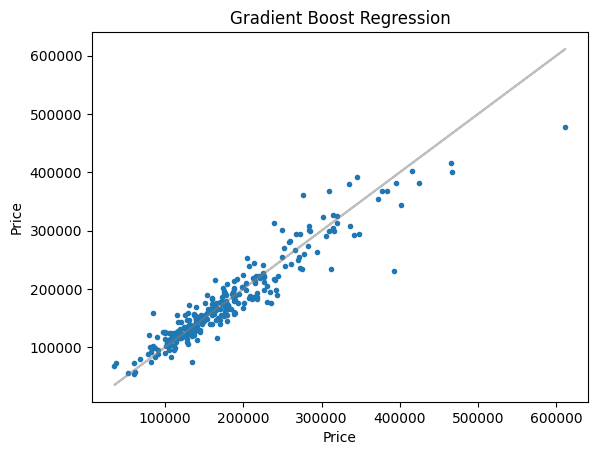

In [14]:
plot_pred(y_test, y_pred, 'Gradient Boost Regression')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


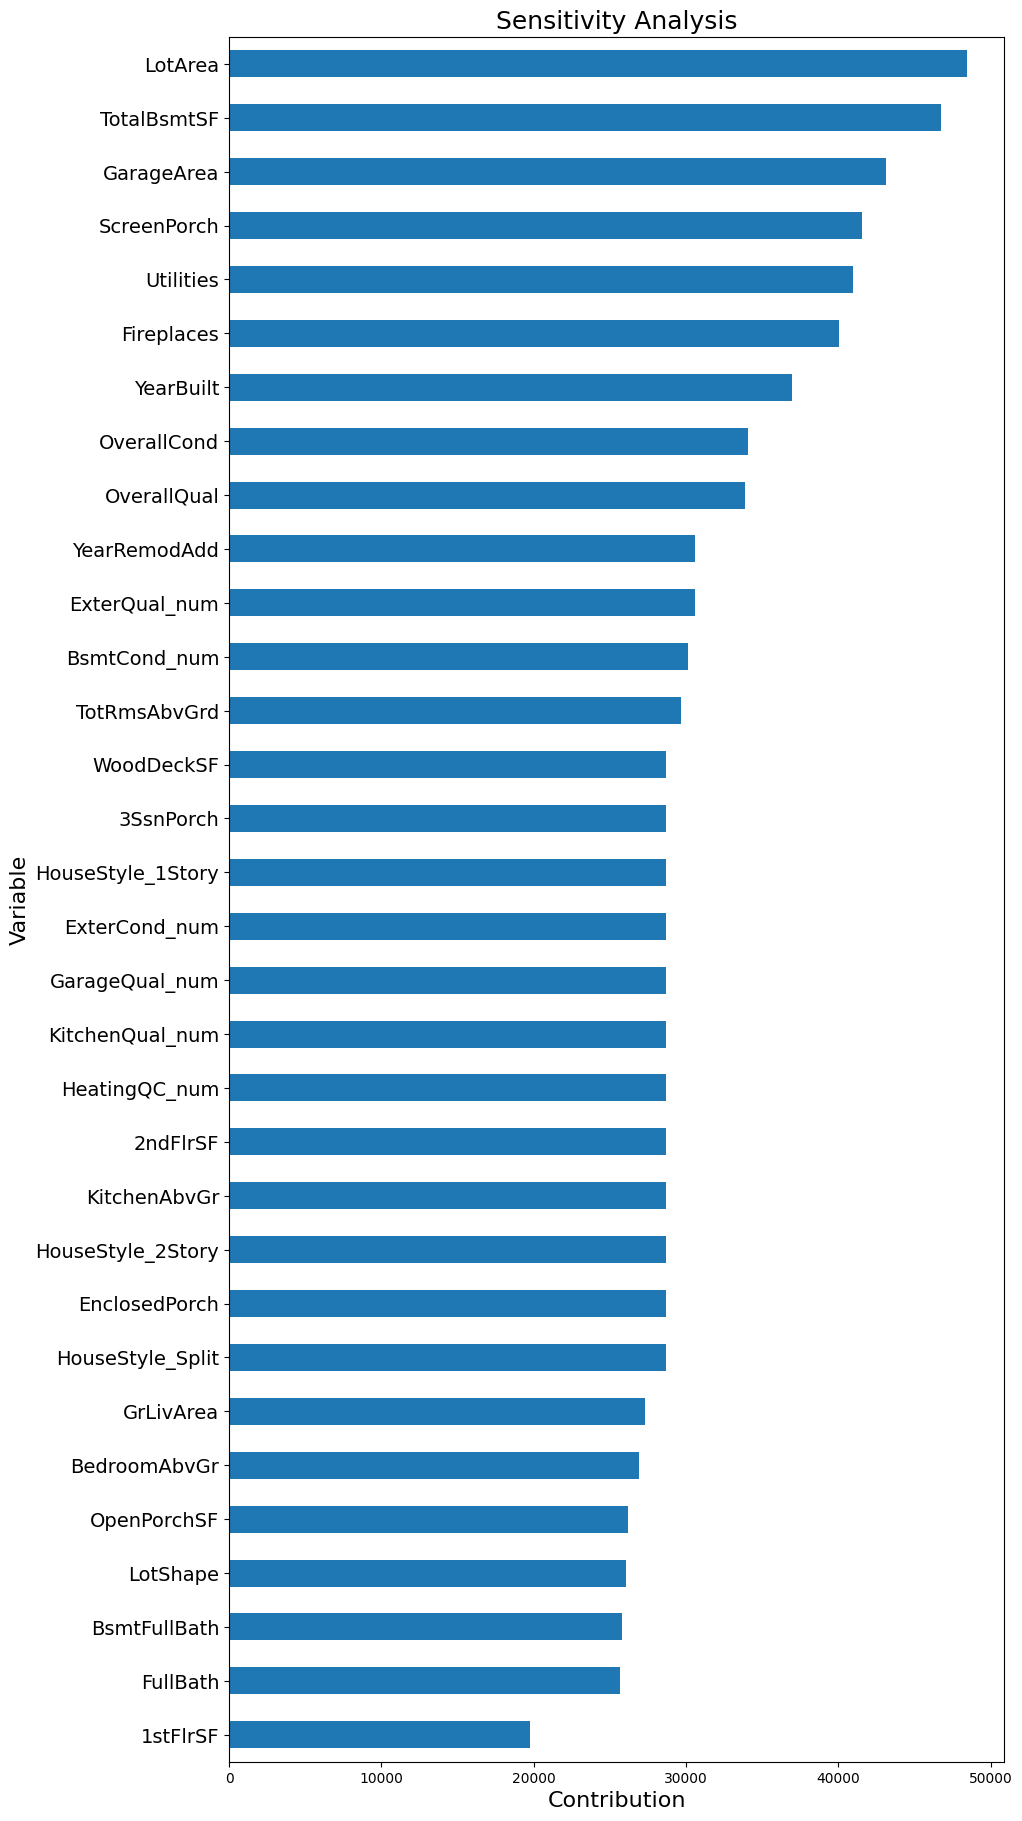

,idx,x,contribution_x
1stFlrSF,0,1779,19752.047250
FullBath,0,1,25663.172621
BsmtFullBath,0,1,25815.951207
LotShape,0,4,26084.578111
OpenPorchSF,0,418,26176.995837
BedroomAbvGr,0,3,26881.294996
GrLivArea,0,1779,27290.244042
HouseStyle_Split,0,0,28667.880346
EnclosedPorch,0,0,28667.880346
HouseStyle_2Story,0,0,28667.880346


In [17]:
sensitivity_df = sensitivity_analysis(model=model, X=X_test, idx=0, bar_plot_yn=True)
sensitivity_df

In [16]:
def sensitivity_analysis(model, X, idx, bar_plot_yn):

    

    import numpy as np

    import pandas as pd

    import matplotlib.pyplot as plt

    import statsmodels.api as sm

    pd.options.mode.chained_assignment = None

    

    # get one object's X values

    X_i = X.iloc[idx, :]

    

    # make a matrix with zeros with shape of [num_cols, num_cols]

    X_mat = np.zeros(shape=[X_i.shape[0], X_i.shape[0]])

    

    # fil X_mat with values from one by one columns, leaving the ohters zeros

    for i, j in enumerate(X_i):

        X_mat[i, i] = j

    

    # data frame with contribution of each X columns in descending order

    sensitivity_df = pd.DataFrame({'idx': idx, 'x': X_i, 'contribution_x': model.predict(X_mat)}).sort_values(by='contribution_x', ascending=True)

    

    # if bar_plot_yn == True then display it

    col_n = X_i.shape[0]

    if bar_plot_yn == True:

        sensitivity_df['contribution_x'].plot(kind='barh', figsize=(10, 0.7*col_n))

        plt.title('Sensitivity Analysis', fontsize=18)

        plt.xlabel('Contribution', fontsize=16)

        plt.ylabel('Variable', fontsize=16)

        plt.yticks(fontsize=14)

        plt.show()

    

    return sensitivity_df





# check UDF

In [35]:
test_data = pd.read_csv('test.csv')


test_data = preprocessing(test_data)
test_data = test_data.fillna(0)

In [36]:
test_pred = model.predict(test_data)

In [37]:
test_pred

array([129980.69502788, 162432.08908998, 178499.09409507, ...,
       166976.80359008, 119954.60753242, 206269.04466928])

In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 데이터 준비
# X: 특성 데이터
# y: 타깃(회귀할 값)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 회귀 모델 생성
# model = xgb.XGBRegressor(n_estimators = 250,learning_rate = 0.08, objective='reg:squarederror', random_state=42)
model = xgb.XGBRegressor(n_estimators = 250,learning_rate = 0.08, objective='reg:squarederror', random_state=42, tree_method='gpu_hist', gpu_id=0)
# XGBRegressor()
# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# GridSearchCV를 사용하여 모델 학습 및 탐색
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 그에 대한 결과 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", np.sqrt(-grid_search.best_score_))

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 평가: 평균 제곱근 오차 (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Best Score: 28895.61876799607
RMSE: 28497.6601048903


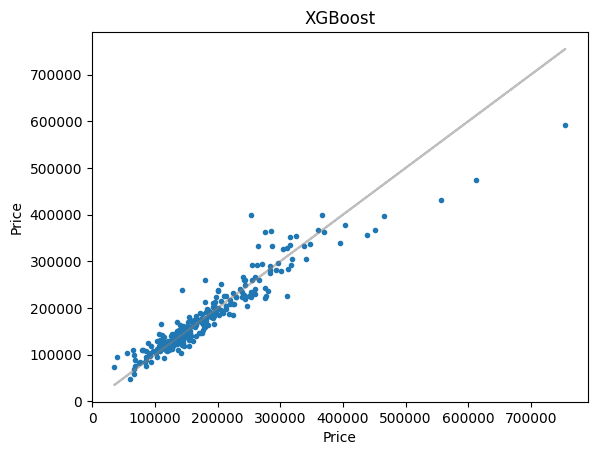

In [25]:
plot_pred(y_test, y_pred, 'XGBoost')


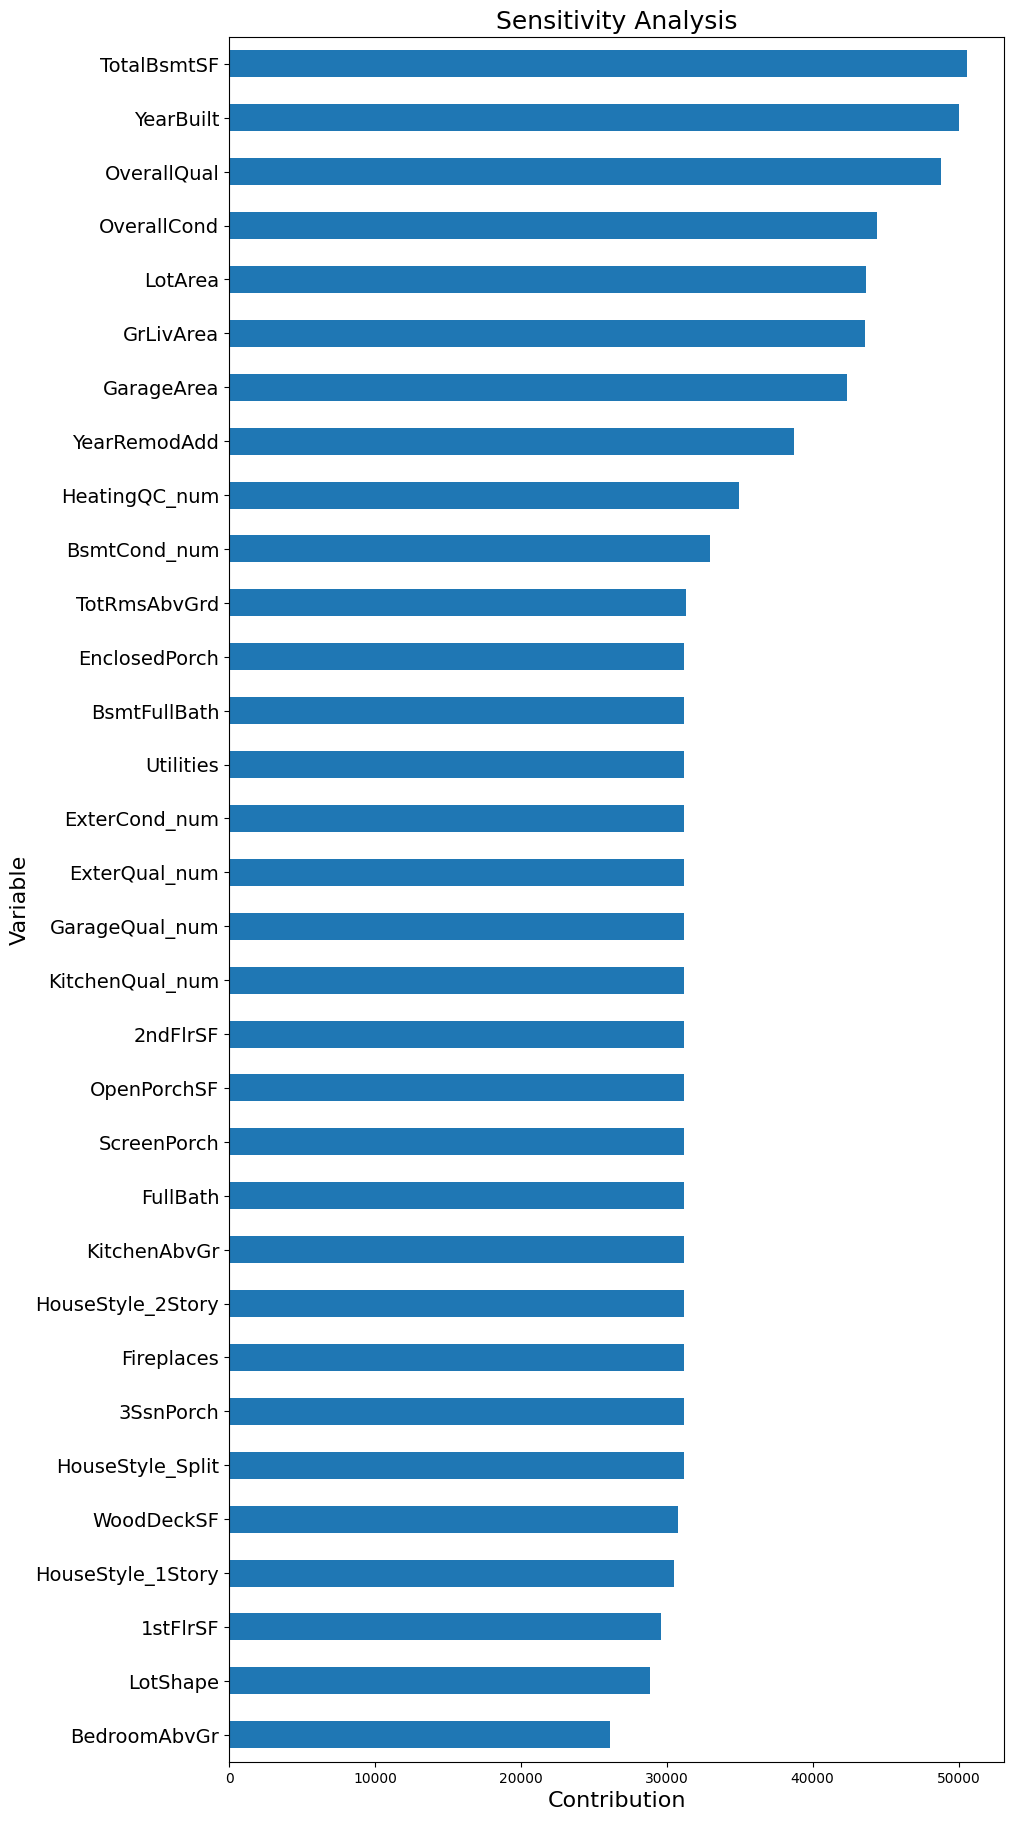

,idx,x,contribution_x
BedroomAbvGr,0,3,26110.833984
LotShape,0,4,28860.126953
1stFlrSF,0,1068,29614.685547
HouseStyle_1Story,0,1,30523.855469
WoodDeckSF,0,192,30791.853516
HouseStyle_Split,0,0,31172.691406
3SsnPorch,0,0,31172.691406
Fireplaces,0,0,31172.691406
HouseStyle_2Story,0,0,31172.691406
KitchenAbvGr,0,1,31172.691406


In [26]:
sensitivity_df = sensitivity_analysis(model=best_model, X=X_test, idx=0, bar_plot_yn=True)
sensitivity_df

In [20]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf.predict(X_test)

# 정확도 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Mean Squared Error: 809192497.3183011
RMSE: 28446.30902803211


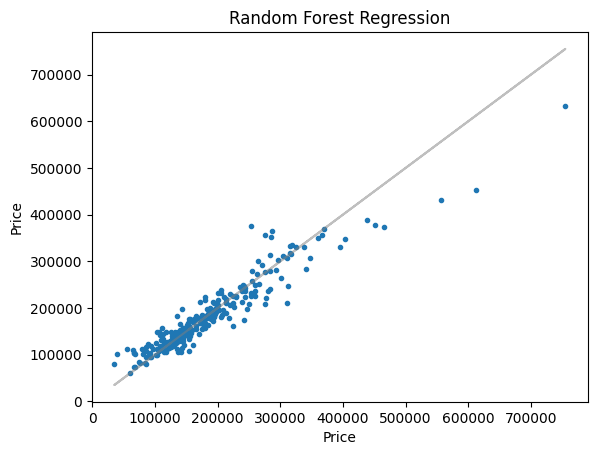

In [21]:
plot_pred(y_test, y_pred, 'Random Forest Regression')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


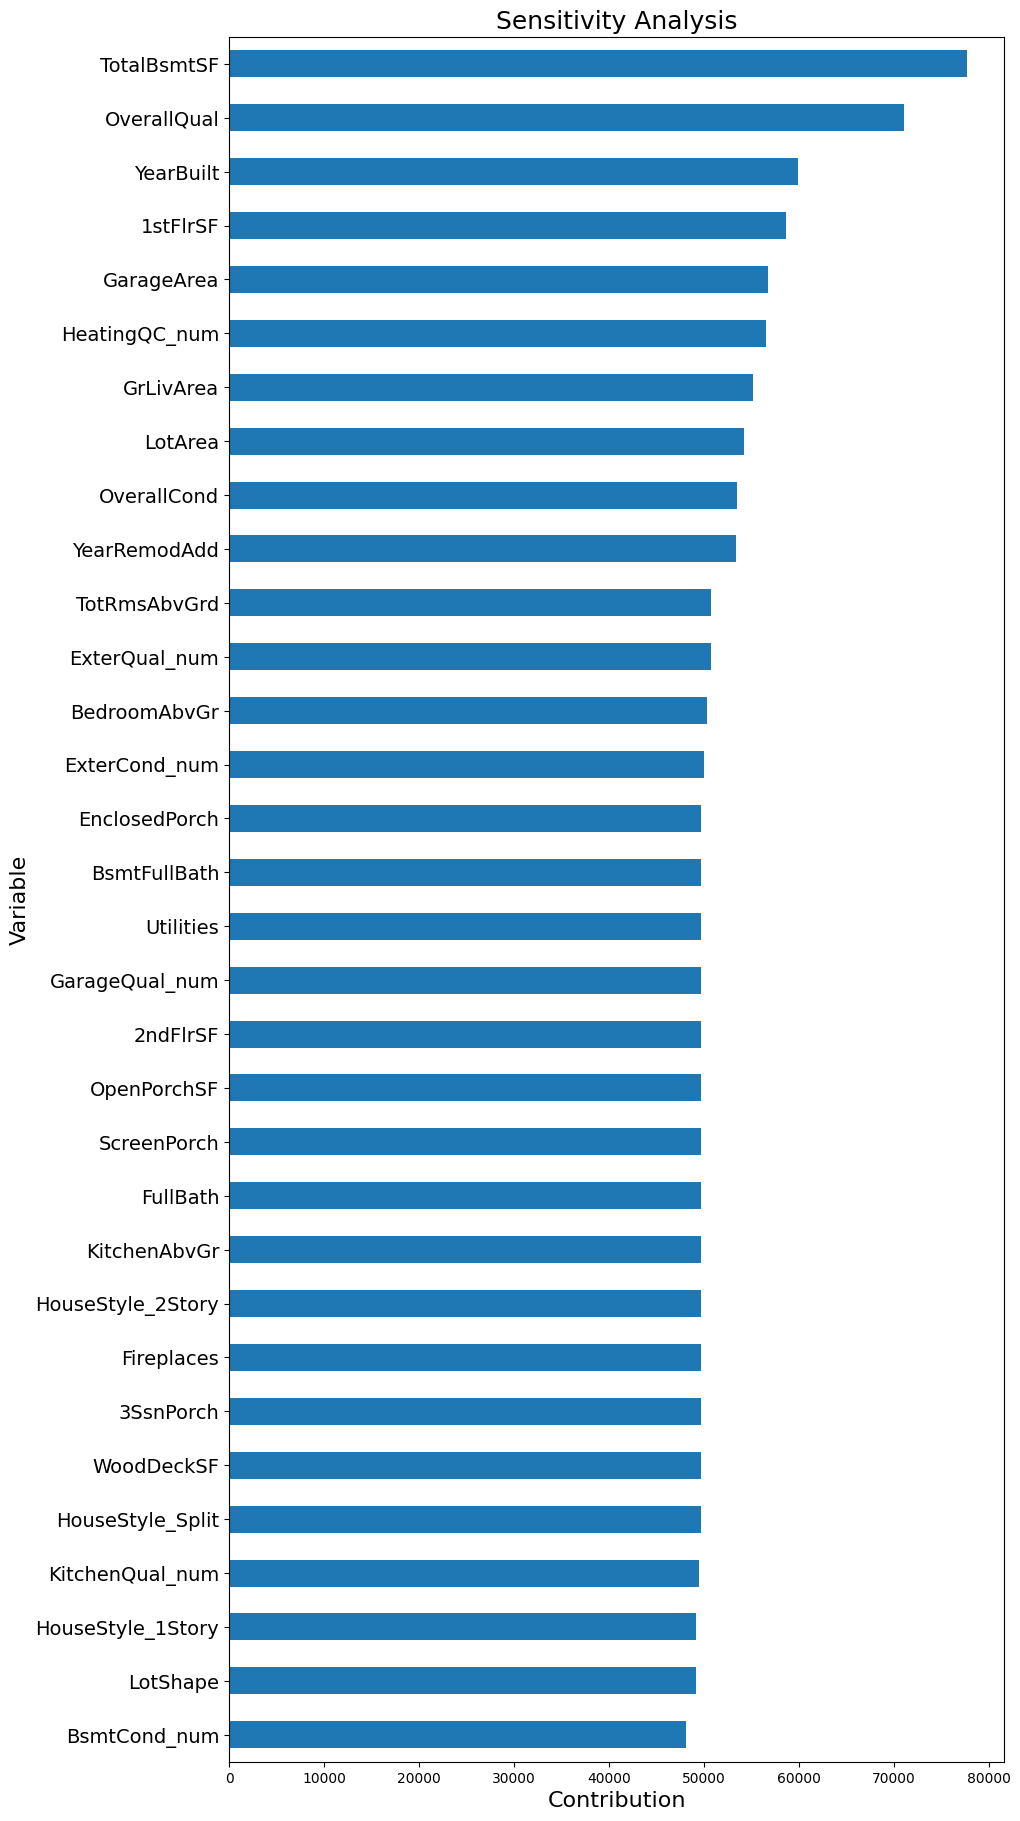

,idx,x,contribution_x
BsmtCond_num,0,5,48129.0
LotShape,0,4,49174.0
HouseStyle_1Story,0,1,49187.0
KitchenQual_num,0,5,49518.0
HouseStyle_Split,0,0,49667.0
WoodDeckSF,0,192,49667.0
3SsnPorch,0,0,49667.0
Fireplaces,0,0,49667.0
HouseStyle_2Story,0,0,49667.0
KitchenAbvGr,0,1,49667.0


In [22]:
sensitivity_df = sensitivity_analysis(model=rf, X=X_test, idx=0, bar_plot_yn=True)
sensitivity_df